In [1]:
#



In [2]:
#

import numpy as np

import matplotlib.pyplot as plt

from nn_vec import NeuralNetwork, Layer

np.random.seed(42)

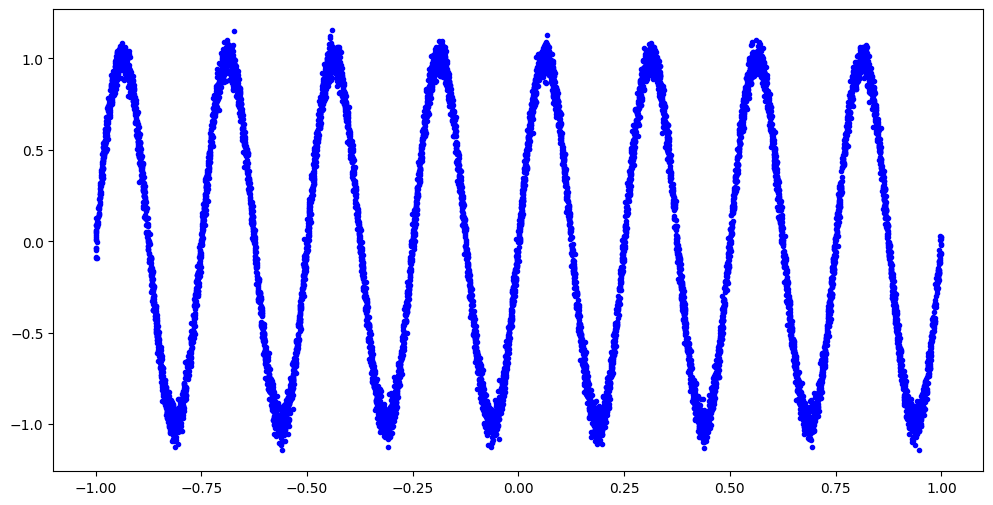

[-0.25091976  0.90142861  0.46398788 ...  0.89341583 -0.20502402
 -0.56571919]
[-0.09750717 -0.6727072  -0.7670356  ... -0.39676546  0.86970342
 -1.01177057]


In [3]:
N = int(1e4)

xx = 2*(np.random.rand(N) - 0.5)
# xx = np.linspace(-1,1,N)

yy = np.zeros((N,1))
yy = np.sin(2*np.pi*4*xx) + 0.05*np.random.randn(N)

plt.figure(figsize=(12,6))
# plt.plot(xx[:,0],yy[:,0])
plt.plot(xx,yy,"b.")
plt.show()

# for kx in np.arange(-1,1.25,0.25):
#     idx = abs(xx[:,0] - kx) <= 0.1/2
#     yy[idx,0] = 0.5
#     idx = abs(xx[:,0] - kx) <= 0.05/2
#     yy[idx,0] = 1
# for ky in np.arange(-1,1.25,0.25):
#     idx = abs(xx[:,1] - ky) <= 0.1/2
#     yy[idx,1] = 0.5
#     idx = abs(xx[:,1] - ky) <= 0.05/2
#     yy[idx,1] = 1

print(xx)
print(yy)

In [4]:
xx = xx.reshape(-1,1)
yy = yy.reshape(-1,1)

In [5]:
idx_train = range(0,int(0.8*xx.shape[0]))
xx_train = xx[idx_train,:]
yy_train = yy[idx_train,:]

idx_test = range(int(0.8*xx.shape[0]),xx.shape[0])
xx_test = xx[idx_test,:]
yy_test = yy[idx_test,:]

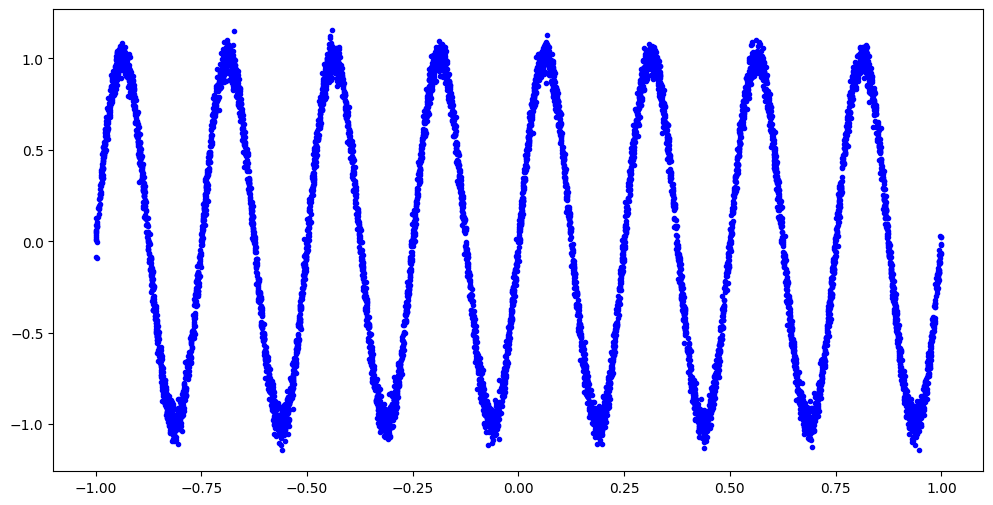

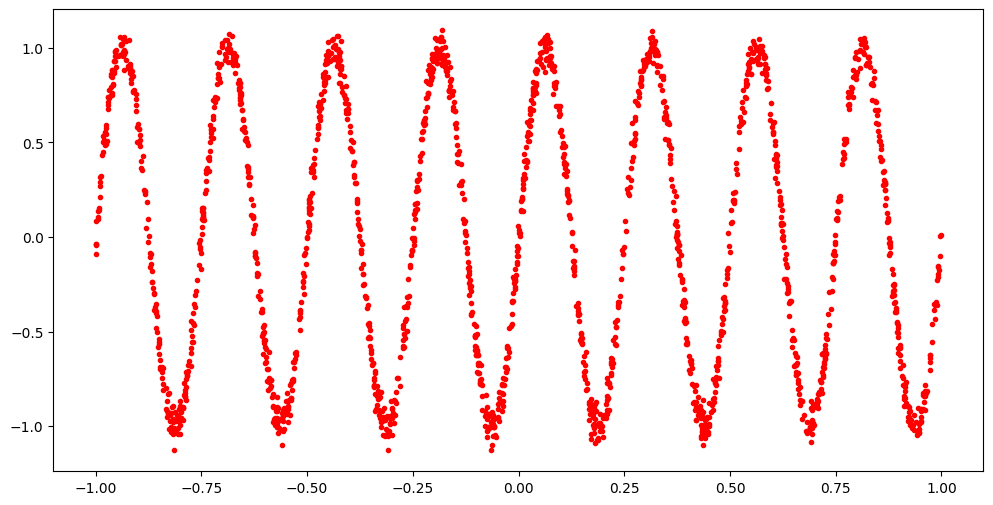

In [6]:
plt.figure(figsize=(12,6))
plt.plot(xx_train[:,0],yy_train[:,0],"b.")
plt.show()

plt.figure(figsize=(12,6))
plt.plot(xx_test[:,0],yy_test[:,0],"r.")
plt.show()

In [19]:
#

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(Y_pred, Y):
    # print("Predictions:", Y_pred)
    # print("Values:", Y)
    return np.sum((Y_pred - Y)**2)/Y.size

def gradient_descent(NN: "NeuralNetwork", X, Y, alpha, iterations=1000, intervals=100):
    flag01 = False
    # W1, b1, W2, b2 = init_params()
    for k1 in range(iterations):
        # Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        NN._compute_output(X)
        # dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        NN._train_step(X, Y, alpha)
        # W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        Y_pred = nn._compute_output(X)
        if k1 % intervals == 0:
            print("Iteration: ", k1)
            Y_pred = nn._compute_output(X)
            print(f"Train accuracy: {get_accuracy(Y_pred, Y)}")
        # if get_accuracy(Y_pred, Y) <= 0.1 and flag01 == False:
        #     flag01 = True
        #     alpha = alpha*10

nn = NeuralNetwork()
layer_list = []
layer_list.append(Layer("input", 1, None))
layer_list.append(Layer("hidden", 32, "tanh"))
layer_list.append(Layer("hidden", 32, "tanh"))
layer_list.append(Layer("hidden", 32, "tanh"))
layer_list.append(Layer("hidden", 32, "tanh"))
layer_list.append(Layer("hidden", 32, "tanh"))
layer_list.append(Layer("hidden", 32, "tanh"))
layer_list.append(Layer("hidden", 32, "tanh"))
layer_list.append(Layer("hidden", 32, "tanh"))
layer_list.append(Layer("hidden", 32, "tanh"))
layer_list.append(Layer("hidden", 32, "tanh"))
layer_list.append(Layer("output", 1, "tanh"))

nn._set_layers(layer_list)

gradient_descent(nn, xx_train.T, yy_train.T, 0.1, 1000, 100)

print("")
print("Training Complete")
print(f"Test accuracy: {get_accuracy(nn._compute_output(xx_test.T), yy_test.T)}")


Neural Network NN03 initialized
Layer L15 initialized | Type: input | Neurons: 1
Layer L16 initialized | Type: hidden | Neurons: 32
Layer L17 initialized | Type: hidden | Neurons: 32
Layer L18 initialized | Type: hidden | Neurons: 32
Layer L19 initialized | Type: hidden | Neurons: 32
Layer L20 initialized | Type: hidden | Neurons: 32
Layer L21 initialized | Type: hidden | Neurons: 32
Layer L22 initialized | Type: hidden | Neurons: 32
Layer L23 initialized | Type: hidden | Neurons: 32
Layer L24 initialized | Type: hidden | Neurons: 32
Layer L25 initialized | Type: hidden | Neurons: 32
Layer L26 initialized | Type: output | Neurons: 1
Iteration:  0
Train accuracy: 1.5038862186124025
Iteration:  100
Train accuracy: 1.1746630339532236
Iteration:  200
Train accuracy: 0.5034980341283477
Iteration:  300
Train accuracy: 0.5414312064460046
Iteration:  400
Train accuracy: 1.0832551345158572
Iteration:  500
Train accuracy: 0.6447216909520517
Iteration:  600
Train accuracy: 0.5898413553085993
Iter

In [17]:
# nn._compute_output(xx_test.T)

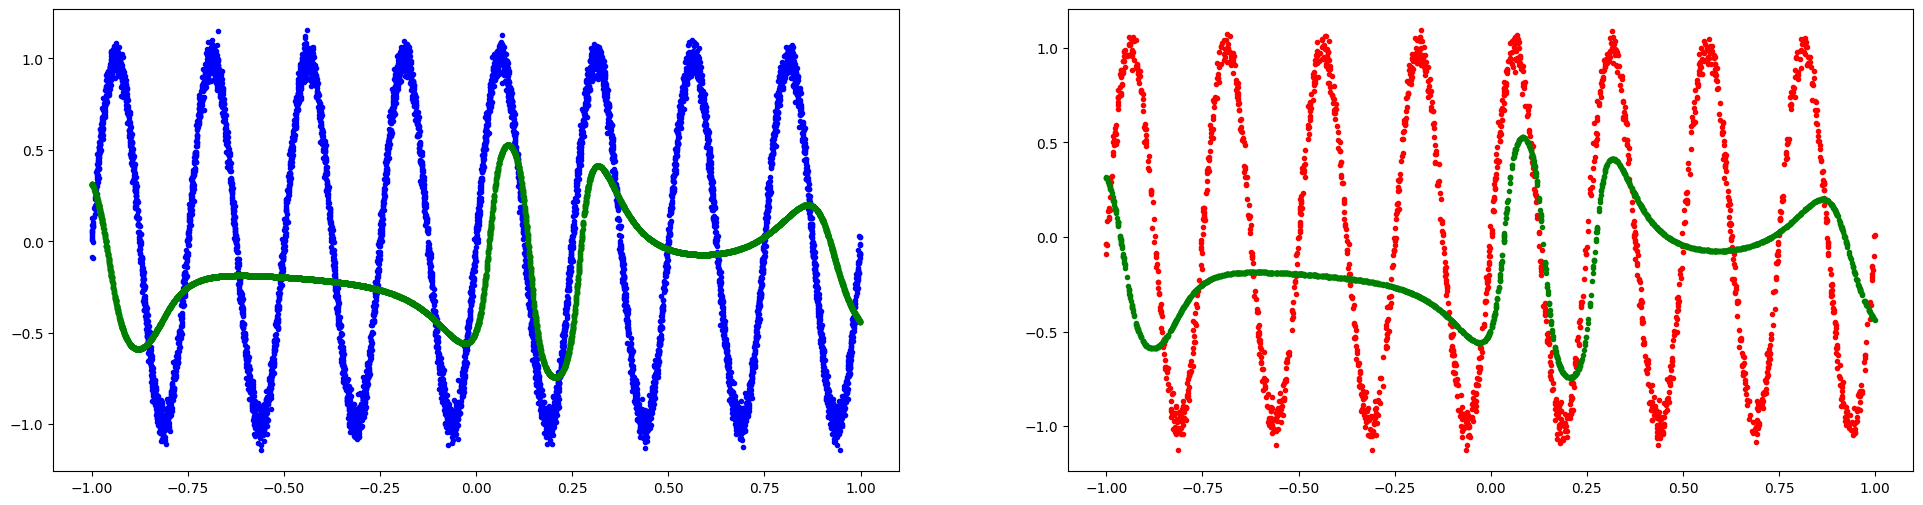

In [18]:
# yy_pred = np.zeros(yy_test.shape)

# for k1 in range(0,xx_test.shape[0]):

#     yy_pred[k1,:] = nn._compute_output(xx_test[[k1],:])

yy_train_pred = nn._compute_output(xx_train.T).T
yy_test_pred = nn._compute_output(xx_test.T).T

plt.figure(figsize=(24,6))
plt.subplot(1,2,1)
plt.plot(xx_train[:,0],yy_train[:,0],"b.")
plt.plot(xx_train[:,0],yy_train_pred[:,0],"g.")
plt.subplot(1,2,2)
plt.plot(xx_test[:,0],yy_test[:,0],"r.")
plt.plot(xx_test[:,0],yy_test_pred[:,0],"g.")
plt.show()


In [10]:
yy_test.size

2000

In [11]:
yy_pred = np.zeros(yy_test.shape)

In [12]:
xx_train.shape

(8000, 1)

In [13]:
xx_train

array([[-0.25091976],
       [ 0.90142861],
       [ 0.46398788],
       ...,
       [-0.0893425 ],
       [ 0.8168751 ],
       [-0.79103937]])

In [14]:
from

SyntaxError: invalid syntax (1763543092.py, line 1)